In [1]:
# Importing required libraries 
import sys
import codecs
import datetime                              # For handling date and time
import lxml.html
import pandas as pd                          # Package to store and manipulate data
import numpy as np                           # Package to store and manipulate data
import matplotlib.pyplot as plt              # Plotting package
import operator
from collections import Counter
import itertools  
import collections
import urllib.request                        # For handling URLs
import dask.dataframe as dd
import seaborn as sns                        # Plotting package 
import sklearn                               # Model building package
from nltk.tokenize import RegexpTokenizer    # For tokrnizing the sentences
from nltk.corpus import stopwords            # For removing stopwords 
import re                                    # Packages to clean text
import nltk                                  # Helps in handling and cleaning text data
nltk.download('stopwords')
nltk.download('punkt')
import nltk as nlp
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import CountVectorizer   
import matplotlib.colors as mcolors
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer   # Helps in sentiment analysis
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package stopwords to C:\Users\dell
[nltk_data]     i5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\dell
[nltk_data]     i5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\dell
[nltk_data]     i5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("AdorableNstyWmn.csv")  # loading dataset 

In [3]:
df.head()       # reading dataset

,id_no,tweet_id,tweet_created_at,tweet_text,in_reply to status_id,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,favorite_count,...,user_name,user_protected,user-verified,lang,user_description,geo_enabled,user_screen_name,user_statuses_count,tweet_truncated,tweet_is_quote_status
0,1,1311387060725379073,2020-09-30 19:26:54,@stevenportnoy We need expert input. It is th...,1311355856450129920,stevenportnoy,1311355856450129920,24703826,24703826,0,...,dora diora noble,False,False,en,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False
1,2,1311386527121829888,2020-09-30 19:24:47,@AaronLo68947221 @JustinKollar @JoeBiden Child...,1311382663928909824,AaronLo68947221,1311382663928909824,1300351487814623232,1300351487814623232,0,...,dora diora noble,False,False,en,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False
2,3,1311385704245522433,2020-09-30 19:21:30,"@DarrellIssa Umm, face masks, then we shouldn'...",1311152470400196608,DarrellIssa,1311152470400196608,22509548,22509548,0,...,dora diora noble,False,False,en,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False
3,4,1311330091209601026,2020-09-30 15:40:31,@oliverdarcy I will take seemingly senile over...,1311095192343252992,oliverdarcy,1311095192343252992,27075032,27075032,0,...,dora diora noble,False,False,en,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False
4,5,1311329203434844161,2020-09-30 15:37:00,@BeauWillimon They are no match for Angry Moms...,1311323228116320256,BeauWillimon,1311323228116320256,28185163,28185163,7,...,dora diora noble,False,False,en,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False


In [4]:
df.describe()      

,id_no,tweet_id,favorite_count,retweet_count,followers_count,friends_count,user_statuses_count
count,1100.000000,1.100000e+03,1100.000000,1100.000000,1100.0,1100.0,1100.0
mean,550.500000,1.290838e+18,0.756364,3163.126364,741.0,1170.0,11456.0
std,317.686953,1.096313e+16,5.822574,22272.378108,0.0,0.0,0.0
min,1.000000,1.278368e+18,0.000000,0.000000,741.0,1170.0,11456.0
25%,275.750000,1.280778e+18,0.000000,0.000000,741.0,1170.0,11456.0
50%,550.500000,1.287355e+18,0.000000,0.000000,741.0,1170.0,11456.0
75%,825.250000,1.302495e+18,0.000000,266.250000,741.0,1170.0,11456.0
max,1100.000000,1.311387e+18,126.000000,670503.000000,741.0,1170.0,11456.0


In [5]:
print('Total tweets this period'), len(df.index)    # total number of tweets in 3 months of a user

Total tweets this period


(None, 1100)

In [6]:
# replacing None values with NaN
df['in_reply_to_user_id'].replace('None', np.nan, inplace=True)

In [7]:
# filling NaN values with '0'
df['in_reply_to_user_id'] = df['in_reply_to_user_id'].fillna(0)

In [8]:
print(df)

      id_no             tweet_id     tweet_created_at  \
0         1  1311387060725379073  2020-09-30 19:26:54   
1         2  1311386527121829888  2020-09-30 19:24:47   
2         3  1311385704245522433  2020-09-30 19:21:30   
3         4  1311330091209601026  2020-09-30 15:40:31   
4         5  1311329203434844161  2020-09-30 15:37:00   
...     ...                  ...                  ...   
1095   1096  1278417166086270976  2020-07-01 19:56:18   
1096   1097  1278415859958951937  2020-07-01 19:51:07   
1097   1098  1278369024921853953  2020-07-01 16:45:01   
1098   1099  1278368344945553408  2020-07-01 16:42:19   
1099   1100  1278367845521342465  2020-07-01 16:40:19   

                                             tweet_text in_reply to status_id  \
0     @stevenportnoy We need expert input.  It is th...   1311355856450129920   
1     @AaronLo68947221 @JustinKollar @JoeBiden Child...   1311382663928909824   
2     @DarrellIssa Umm, face masks, then we shouldn'...   13111524704001

In [9]:
# extracting Image URL's from entities column 
df['entities'] = df.entities.str.extract(r'(http(s?):)([/|.|\w|\s|-])*\.(?:jpg|gif|png)')

In [10]:
# creating dataframe of urls present in the entities
urls = df.entities.items()
image_urls = list(urls)
df_urls = pd.DataFrame(image_urls)

In [11]:
df_multimedia = df_urls.set_axis(['tweet_without_media', 'tweet_with_multimedia'], axis=1, inplace=False)

In [12]:
df_multimedia['tweet_with_multimedia'] = df_multimedia['tweet_with_multimedia'].fillna(0)    # filling NaN values with '0'
df_multimedia['tweet_with_multimedia'].value_counts().head()     # function for counting images urls present in the column 

0        1059
http:      41
Name: tweet_with_multimedia, dtype: int64

Text(0.5, 1.0, '#percentahe of Images used in their tweets by a user')

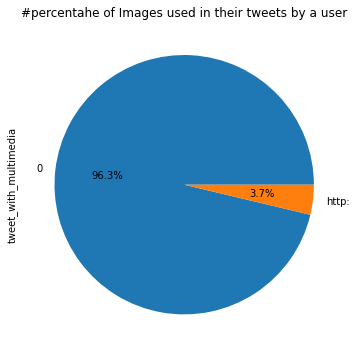

In [13]:
plt.figure(figsize=(5,5)) 
df_multimedia['tweet_with_multimedia'].value_counts().plot(kind='pie', autopct='%1.1f%%')  # function for counting and ploting images urls from the coulmn using pie chart  
plt.grid(False)
plt.tight_layout()
plt.title('#percentahe of Images used in their tweets by a user')

In [14]:
# This function will extract hashtags
def find_hashtags(tweet_text):
     return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)',  str(tweet_text))

In [15]:
df['hashtags'] = df['tweet_text'].apply(find_hashtags)

In [16]:
# Hashtags & mentions
tag_dict = {} 
mention_dict = {}
for i in df.index:
    Tweet_text = df.iloc[i]['tweet_text']
    tweet =  str(Tweet_text).lower()    # lower case 
    tweet_tokenized = tweet.split()     # tokenization

    for word in tweet_tokenized:
        # Hashtags - tokenize and build dict of tag counts
        if (word[0:1] == '#' and len(word) > 1):
            key = word.translate(str.maketrans("",""))
            if key in tag_dict:
                tag_dict[key] += 1
            else:
                tag_dict[key] = 1
                
        # Mentions - tokenize and build dict of mention counts      
        if (word[0:1] == '@' and len(word) > 1):
            key = word.translate(str.maketrans("",""))
            if key in mention_dict:
                mention_dict[key] += 1
            else:
                mention_dict[key] = 1
                
# The 10 most popular tags and counts                
top_tags = dict(sorted(tag_dict.items(), key=operator.itemgetter(1), reverse=True)[:10])
top_tags_sorted = sorted(top_tags.items(), key=lambda x: x[1])[::-1]

# The 10 most popular mentions and counts
top_mentions = dict(sorted(mention_dict.items(), key=operator.itemgetter(1), reverse=True)[:10])
top_mentions_sorted = sorted(top_mentions.items(), key=lambda x: x[1])[::-1]

In [17]:
print(top_tags)      # top 10 hashtags used by a user 

{'#trumpvirus': 8, '#impeachbarr': 7, '#resignnowtrump': 7, '#covid19': 6, '#gopcowards': 6, '#sickofallthewinning': 5, '#removetrumpnow': 4, '#sethabramsonag2020': 3, '#votehimout': 2, '#killerinchief': 2}


In [18]:
print(top_mentions)  # top 10 mentions used by a user

{'@realdonaldtrump': 84, '@bandyxlee1:': 57, '@bandyxlee1': 36, '@americanreunif1': 36, '@bucksexton': 28, '@sethabramson:': 26, '@repswalwell': 25, '@roguesnradvisor': 25, '@sethabramson': 20, '@joebiden': 11}


In [19]:
# creating dataframe of top 10 hashtags 
data_items = top_tags.items()
data_list = list(data_items)
df_top_tags = pd.DataFrame(data_list)

Text(0, 0.5, 'counts')

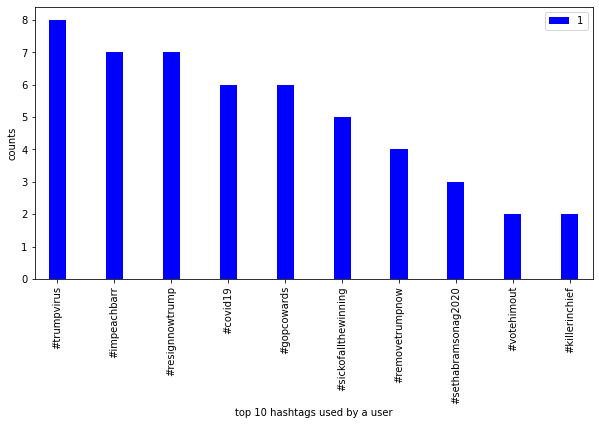

In [20]:
df_top_tags.plot(kind='bar',x=0,y=1, width =0.3,figsize =(10,5), color = 'blue')
plt.xlabel('top 10 hashtags used by a user') 
plt.ylabel('counts')

In [21]:
df['source'].value_counts().head()  # function for counting different sources used by a user

Twitter for Android    964
Twitter Web App        136
Name: source, dtype: int64

Text(0.5, 1.0, '# different sources used by a user to post the tweets')

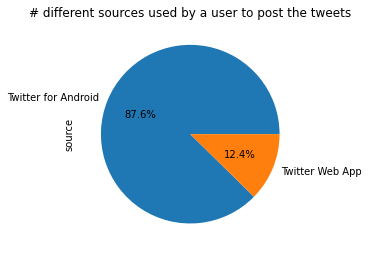

In [22]:
plt.figure(figsize=(5,5)) 
df.source.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.grid(False)
plt.tight_layout()
plt.title('# different sources used by a user to post the tweets')

In [23]:
# changing datetime format 
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])
df.set_index(df['tweet_created_at'],inplace=True)
df.index
data_sample_from_pd = dd.from_pandas(df, npartitions=1)
data_sample_from_pd.index.head()

DatetimeIndex(['2020-07-01 16:40:19', '2020-07-01 16:42:19',
               '2020-07-01 16:45:01', '2020-07-01 19:51:07',
               '2020-07-01 19:56:18'],
              dtype='datetime64[ns]', name='tweet_created_at', freq=None)

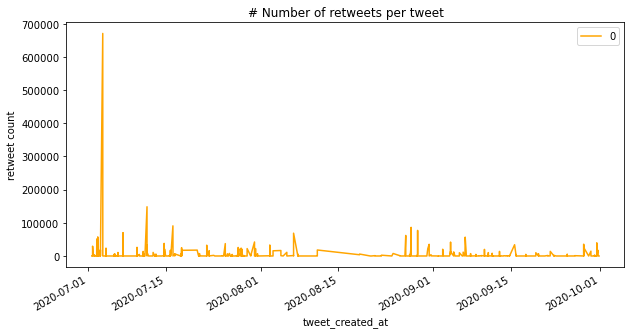

In [24]:
# Analysing number of retweets per tweet
time_retweets = pd.DataFrame(data =df['retweet_count'].values, index = df['tweet_created_at'])
time_retweets.plot(figsize=(10, 5), color='orange')
plt.ylabel('retweet count') 
plt.title('# Number of retweets per tweet')
plt.savefig("bot retweets per tweet.pdf")

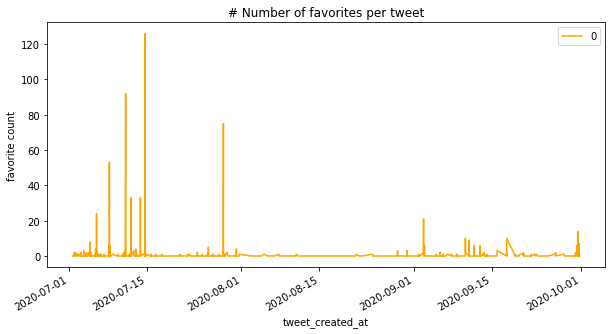

In [25]:
# Analysig number of favorites per tweet
time_favorites = pd.DataFrame(data =df['favorite_count'].values, index = df['tweet_created_at'])
time_favorites.plot(figsize=(10, 5), color='orange')
plt.ylabel('favorite count') 
plt.title('# Number of favorites per tweet')
plt.savefig("bot fav per tweet.pdf")

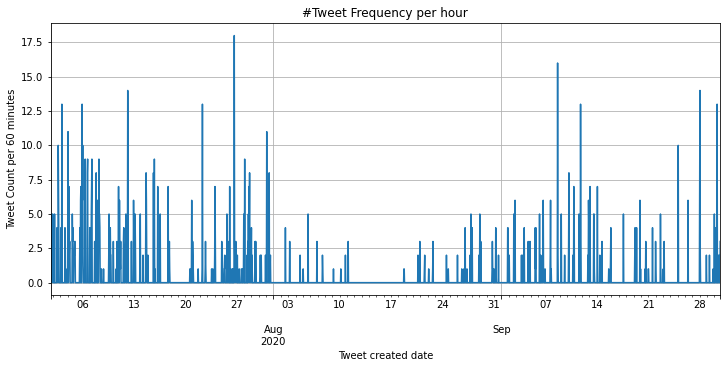

In [26]:
# grouping frequency of tweets per hour by a user
df_60min = df.groupby(pd.Grouper(key='tweet_created_at', freq='60min', convention='start')).size()  
df_60min.plot(figsize=(12,5))
plt.ylabel('Tweet Count per 60 minutes')
plt.title('#Tweet Frequency per hour')
plt.xlabel('Tweet created date')
plt.grid(True)
plt.savefig("tweet freq per hour.pdf")

In [27]:
# grouping frequency of tweets per day
per_day_tweets = df.groupby(df['tweet_created_at'].dt.date).size().reset_index(name='Count')

In [31]:
fig = px.area(per_day_tweets, x ="tweet_created_at",  y ="Count")
fig.show()

In [32]:
# grouping frequency of tweets per month by a user
tweets_per_month = df.groupby(df['tweet_created_at'].dt.month).size().reset_index(name='Count')

In [33]:
print(tweets_per_month) 

   tweet_created_at  Count
0                 7    681
1                 8     92
2                 9    327


In [34]:
fig = px.area(tweets_per_month, x ="tweet_created_at",  y ="Count")
fig.show()

In [ ]:
#### FEATURE ENGINEERING for convering 3 months data of each user to one row format 

In [35]:
user_name = df['user_screen_name'].mode()

In [36]:
# checking whether the user involved in a conversation or not
user_invol_conversation = pd.to_numeric(df['in_reply_to_user_id'], errors='coerce').notnull().any()

In [37]:
# checking whether user geo enalbled or not
user_geo_enabled = df.mode()['geo_enabled'][0]

In [38]:
# checking whether user verifed or not
user_verified = df.mode()['user-verified'][0]

In [39]:
# analysing whether user's followers count is greater than friends count
df['Result'] = np.where(df['followers_count'].max(axis=0)>(df['friends_count']), 1, 0)

In [40]:
user_flw_frnd_count = df['Result'].mode()

In [41]:
# finding cosine similarity between favorites and retweet count
Artist_x=df.favorite_count.values.reshape(-1,1)
Artist_y=df.retweet_count.values.reshape(-1,1)
cosine_similarity(Artist_x,Artist_y)
df_cosine_sim = cosine_similarity(df['favorite_count'].values.reshape(1,-1), df['retweet_count'].values.reshape(1,-1))

In [42]:
print(df_cosine_sim)

[[4.02374831e-05]]


In [43]:
df5 = pd.DataFrame(df_cosine_sim)

In [44]:
df_cosine_simililarity = df5.loc[0,].round()

In [45]:
df_cosine_simililarity

0    0.0
Name: 0, dtype: float64

In [46]:
# function for counting number tweets per day
def number_of_tweets_per_day(df):
     df = pd.DataFrame(['tweet_created_at'],['tweet_text'])
     df['tweet_created_at'] = df['tweet_created_at'].astype(str)
     df['tweet_text'] = df['tweet_text'].astype(str)
     df['tweet_created_at'] = df['tweet_created_at'] + '-' + df[tweet_text]
     df.groupby(df['tweet_created_at'].dt.date).size().reset_index(name='Count')

In [47]:
number_of_tweets_per_day = df.groupby(df['tweet_created_at'].dt.date).size().reset_index(name='Count')

In [48]:
# number of tweets per day
print(number_of_tweets_per_day)

   tweet_created_at  Count
0        2020-07-01     18
1        2020-07-02     35
2        2020-07-03     24
3        2020-07-04     52
4        2020-07-05     39
..              ...    ...
70       2020-09-25     10
71       2020-09-26      6
72       2020-09-28     26
73       2020-09-29      3
74       2020-09-30     33

[75 rows x 2 columns]


In [49]:
# converting data format to year-month-date-time calculating differece between tweets
print(df.index)

DatetimeIndex(['2020-09-30 19:26:54', '2020-09-30 19:24:47',
               '2020-09-30 19:21:30', '2020-09-30 15:40:31',
               '2020-09-30 15:37:00', '2020-09-30 14:21:43',
               '2020-09-30 14:21:43', '2020-09-30 09:53:54',
               '2020-09-30 09:53:34', '2020-09-30 09:49:11',
               ...
               '2020-07-01 20:06:11', '2020-07-01 20:01:31',
               '2020-07-01 19:59:21', '2020-07-01 19:57:30',
               '2020-07-01 19:56:59', '2020-07-01 19:56:18',
               '2020-07-01 19:51:07', '2020-07-01 16:45:01',
               '2020-07-01 16:42:19', '2020-07-01 16:40:19'],
              dtype='datetime64[ns]', name='tweet_created_at', length=1100, freq=None)


In [50]:
# assinging the converted date format to new column for calculating the time differnce between each tweet
df['tvalue'] = df.index

In [51]:
# finding time differnce between each tweet and assigning the difference to new column as "delta"
df['delta'] = (df['tvalue']-df['tvalue'].shift()).fillna(pd.Timedelta('0 days'))

In [52]:
df.head()

,id_no,tweet_id,tweet_created_at,tweet_text,in_reply to status_id,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,favorite_count,...,user_description,geo_enabled,user_screen_name,user_statuses_count,tweet_truncated,tweet_is_quote_status,hashtags,Result,tvalue,delta
tweet_created_at,,,,,,,,,,,,,,,,,,,,,
2020-09-30 19:26:54,1,1311387060725379073,2020-09-30 19:26:54,@stevenportnoy We need expert input. It is th...,1311355856450129920,stevenportnoy,1311355856450129920,24703826,24703826,0,...,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:26:54,0 days 00:00:00
2020-09-30 19:24:47,2,1311386527121829888,2020-09-30 19:24:47,@AaronLo68947221 @JustinKollar @JoeBiden Child...,1311382663928909824,AaronLo68947221,1311382663928909824,1300351487814623232,1300351487814623232,0,...,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:24:47,-1 days +23:57:53
2020-09-30 19:21:30,3,1311385704245522433,2020-09-30 19:21:30,"@DarrellIssa Umm, face masks, then we shouldn'...",1311152470400196608,DarrellIssa,1311152470400196608,22509548,22509548,0,...,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:21:30,-1 days +23:56:43
2020-09-30 15:40:31,4,1311330091209601026,2020-09-30 15:40:31,@oliverdarcy I will take seemingly senile over...,1311095192343252992,oliverdarcy,1311095192343252992,27075032,27075032,0,...,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 15:40:31,-1 days +20:19:01
2020-09-30 15:37:00,5,1311329203434844161,2020-09-30 15:37:00,@BeauWillimon They are no match for Angry Moms...,1311323228116320256,BeauWillimon,1311323228116320256,28185163,28185163,7,...,Evaluation of @realDonaldTrump's mental state ...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 15:37:00,-1 days +23:56:29


In [53]:
# calculating the difference in time between each tweet in minutes 
df['ΔT'] = df.index.to_series().diff().astype('timedelta64[m]')

In [54]:
# filling nan alues as 0
df.index.to_series().diff().fillna(pd.Timedelta(seconds=0)).astype('timedelta64[m]').astype('int')

tweet_created_at
2020-09-30 19:26:54      0
2020-09-30 19:24:47     -3
2020-09-30 19:21:30     -4
2020-09-30 15:40:31   -221
2020-09-30 15:37:00     -4
                      ... 
2020-07-01 19:56:18     -1
2020-07-01 19:51:07     -6
2020-07-01 16:45:01   -187
2020-07-01 16:42:19     -3
2020-07-01 16:40:19     -2
Name: tweet_created_at, Length: 1100, dtype: int32

In [55]:
# finding mean, max, and min values of the time differnce value for normalization purpose
mean_abc = df.ΔT.dropna().mean()
max_abc = df.ΔT.dropna().max()
min_abc = df.ΔT.dropna().min()

In [56]:
# diffrence in time between each tweet with normalization as a new column 
df['ΔT'] = df['ΔT'].apply(lambda x: (x - mean_abc ) / (max_abc -min_abc ))

In [57]:
df.head()

,id_no,tweet_id,tweet_created_at,tweet_text,in_reply to status_id,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,favorite_count,...,geo_enabled,user_screen_name,user_statuses_count,tweet_truncated,tweet_is_quote_status,hashtags,Result,tvalue,delta,ΔT
tweet_created_at,,,,,,,,,,,,,,,,,,,,,
2020-09-30 19:26:54,1,1311387060725379073,2020-09-30 19:26:54,@stevenportnoy We need expert input. It is th...,1311355856450129920,stevenportnoy,1311355856450129920,24703826,24703826,0,...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:26:54,0 days 00:00:00,NaN
2020-09-30 19:24:47,2,1311386527121829888,2020-09-30 19:24:47,@AaronLo68947221 @JustinKollar @JoeBiden Child...,1311382663928909824,AaronLo68947221,1311382663928909824,1300351487814623232,1300351487814623232,0,...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:24:47,-1 days +23:57:53,0.010705
2020-09-30 19:21:30,3,1311385704245522433,2020-09-30 19:21:30,"@DarrellIssa Umm, face masks, then we shouldn'...",1311152470400196608,DarrellIssa,1311152470400196608,22509548,22509548,0,...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:21:30,-1 days +23:56:43,0.010613
2020-09-30 15:40:31,4,1311330091209601026,2020-09-30 15:40:31,@oliverdarcy I will take seemingly senile over...,1311095192343252992,oliverdarcy,1311095192343252992,27075032,27075032,0,...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 15:40:31,-1 days +20:19:01,-0.009264
2020-09-30 15:37:00,5,1311329203434844161,2020-09-30 15:37:00,@BeauWillimon They are no match for Angry Moms...,1311323228116320256,BeauWillimon,1311323228116320256,28185163,28185163,7,...,True,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 15:37:00,-1 days +23:56:29,0.010613


In [58]:
df['ΔT'] = df['ΔT'].fillna(0)       # filling nan values as 0

In [59]:
min_max_scaler = MinMaxScaler()

In [60]:
x_scaled = min_max_scaler.fit_transform(df['ΔT'].values.reshape(-1, 1))

In [61]:
df_normalized = pd.DataFrame(x_scaled)

In [62]:
df_std = (df_normalized.std())    # finding standard deviation of time differnce coulmn 

In [63]:
df_std.loc[0,]

0.04360521548236752

In [64]:
# This function will extract the twitter handles of retweed people
def find_retweeted(tweet_text):
     return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet.text)

In [65]:

# This function will extract the twitter handles of people mentioned in the tweet
def find_mentioned(tweet_text):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweetl_text)

In [66]:
# This function will extract hashtags
def find_hashtags(tweet_text):
     return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)',  tweet_text)

In [67]:
# Takes a string and removes web links from it   
def remove_links(tweet_text):
    tweet_text = re.sub(r'http\S+', '', tweet_text)
    tweet_text = re.sub(r'bit.ly/\S+', '', tweet_text)
    tweet_text = tweet_text.strip('[link]')
    return tweet_text

In [68]:
# Takes a string and removes retweet and @user information
def remove_users(tweet_text):
    tweet_text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet_text)
    tweet_text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet_text)
    return tweet_text

In [69]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

In [70]:
df['tweet_text'] = df['tweet_text'].str.replace('[^\w\s]','')

<ipython-input-70-aa9134029cce>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [71]:
# cleaning master function
clean_tweet = []
for tweet_text in df.tweet_text: 
    tweet_text = re.sub('[^a-zA-Z]',' ',str(tweet_text))
    tweet_text = tweet_text.lower()               # lower case
    tweet_text = remove_users(tweet_text)         # remove user mentions 
    tweet_text = remove_links(tweet_text)         # remove links 
    tweet_text = nltk.word_tokenize(tweet_text)   # tokenization 
    tweet_token = [ word for word in tweet_text if not word in set(stopwords.words('english'))]  # remove stopwords 
    tweet_token = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token]
    tweet_text = " ".join(tweet_token)
    clean_tweet.append(tweet_text)

In [72]:
# creating object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [73]:
# creating new column of cleaned tweets 
df['clean_tweet'] = df['tweet_text'].apply(lambda clean_tweet:clean_tweet)

In [74]:
df.head()

,id_no,tweet_id,tweet_created_at,tweet_text,in_reply to status_id,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,favorite_count,...,user_screen_name,user_statuses_count,tweet_truncated,tweet_is_quote_status,hashtags,Result,tvalue,delta,ΔT,clean_tweet
tweet_created_at,,,,,,,,,,,,,,,,,,,,,
2020-09-30 19:26:54,1,1311387060725379073,2020-09-30 19:26:54,stevenportnoy We need expert input It is the ...,1311355856450129920,stevenportnoy,1311355856450129920,24703826,24703826,0,...,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:26:54,0 days 00:00:00,0.000000,stevenportnoy We need expert input It is the ...
2020-09-30 19:24:47,2,1311386527121829888,2020-09-30 19:24:47,AaronLo68947221 JustinKollar JoeBiden Child mo...,1311382663928909824,AaronLo68947221,1311382663928909824,1300351487814623232,1300351487814623232,0,...,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:24:47,-1 days +23:57:53,0.010705,AaronLo68947221 JustinKollar JoeBiden Child mo...
2020-09-30 19:21:30,3,1311385704245522433,2020-09-30 19:21:30,DarrellIssa Umm face masks then we shouldnt ne...,1311152470400196608,DarrellIssa,1311152470400196608,22509548,22509548,0,...,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 19:21:30,-1 days +23:56:43,0.010613,DarrellIssa Umm face masks then we shouldnt ne...
2020-09-30 15:40:31,4,1311330091209601026,2020-09-30 15:40:31,oliverdarcy I will take seemingly senile over ...,1311095192343252992,oliverdarcy,1311095192343252992,27075032,27075032,0,...,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 15:40:31,-1 days +20:19:01,-0.009264,oliverdarcy I will take seemingly senile over ...
2020-09-30 15:37:00,5,1311329203434844161,2020-09-30 15:37:00,BeauWillimon They are no match for Angry Moms ...,1311323228116320256,BeauWillimon,1311323228116320256,28185163,28185163,7,...,AdorableNstyWmn,11456,False,False,[],0,2020-09-30 15:37:00,-1 days +23:56:29,0.010613,BeauWillimon They are no match for Angry Moms ...


In [75]:
sid.polarity_scores(df.iloc[0]['clean_tweet'])    # example of first row polarity score 

{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.5423}

In [76]:
# applying polarity scores to the cleaned tweets and making new column as scores
df['scores'] = df['clean_tweet'].apply(lambda clean_tweet:sid.polarity_scores(str(clean_tweet)))

In [77]:
# making new column as compund scores 
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [78]:
df['score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')   # assigning  pos tag if compound score is greater than eqaul to 0 else neg

In [79]:
# functoon for counting number of positive, negative, and neutral tweets 
summary = {"positive":0,"neutral":0,"negative":0}
for clean_tweet in df.clean_tweet: 
    ss = sid.polarity_scores(str(clean_tweet))
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1
print(summary)

{'positive': 362, 'neutral': 266, 'negative': 472}


In [80]:
# converting dictionary into dataframe
data_items = summary.items()
data_list = list(data_items)
df_sent= pd.DataFrame(data_list)

In [81]:
print(df_sent)

          0    1
0  positive  362
1   neutral  266
2  negative  472


In [82]:
# taking only one sentiment which has maximum counts
df_sentiment= df_sent.iloc[df_sent[1].idxmax()] 

In [83]:
df_sentiment.loc[0,]

'negative'

In [84]:
# creating a dictionary of all the feature engineered attribtes for converting data into one row format per user
merged_d = dict()
merged_d['user_screen_name'] = user_name
merged_d['user_involved_in_conv'] = user_invol_conversation 
merged_d['geo_ebaled'] = user_geo_enabled 
merged_d['user_verified'] = user_verified 
merged_d['followers_count > friends_count'] = user_flw_frnd_count
merged_d['fav_&_retweet_are_identical'] = df_cosine_simililarity
merged_d['regularity_in_tweeting'] = df_std.loc[0,]
merged_d['sentiment_of_tweets'] = df_sentiment.loc[0,]

In [85]:
print(merged_d)

{'user_screen_name': 0    AdorableNstyWmn
dtype: object, 'user_involved_in_conv': True, 'geo_ebaled': True, 'user_verified': False, 'followers_count > friends_count': 0    0
dtype: int32, 'fav_&_retweet_are_identical': 0    0.0
Name: 0, dtype: float64, 'regularity_in_tweeting': 0.04360521548236752, 'sentiment_of_tweets': 'negative'}


In [86]:
dataframe = pd.DataFrame.from_dict(merged_d)  # converting dictionary into dataframe
merged_df = pd.DataFrame(data = merged_d, index = [0])

In [87]:
# appending data obtained after individual profile analysis
# and feature engineering from one user to convert 3 months data into one row format per user
df_final = pd.concat([dataframe]) 

In [88]:
df_final   

,user_screen_name,user_involved_in_conv,geo_ebaled,user_verified,followers_count > friends_count,fav_&_retweet_are_identical,regularity_in_tweeting,sentiment_of_tweets
0,AdorableNstyWmn,True,True,False,0,0.0,0.043605,negative
